In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


In [2]:
train_data = pd.read_csv('../input/tabular-playground-series-aug-2021/train.csv')
train_data.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [3]:
test_data = pd.read_csv('../input/tabular-playground-series-aug-2021/test.csv')
test_data.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


### Check for column length for two datasets

In [4]:
print("Length of train column is " + str(len(train_data.columns)))
print("Length of test column is " + str(len(test_data.columns)))

Length of train column is 102
Length of test column is 101


### Check for null data for two datasets

In [5]:
train_data.isnull().sum()

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f96     0
f97     0
f98     0
f99     0
loss    0
Length: 102, dtype: int64

In [6]:
test_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of            id     f0     f1     f2     f3     f4     f5     f6     f7     f8  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
149995  False  False  False  False  False  False  False  False  False  False   
149996  False  False  False  False  False  False  False  False  False  False   
149997  False  False  False  False  False  False  False  False  False  False   
149998  False  False  False  False  False  False  False  False  False  False   
149999  False  False  False  False  False  False  False  F

#### Train data have 250000 rows × 102 columns
#### Test data have 150000 rows × 101 columns

In [7]:
train_data.drop(['id'], axis=1, inplace=True)

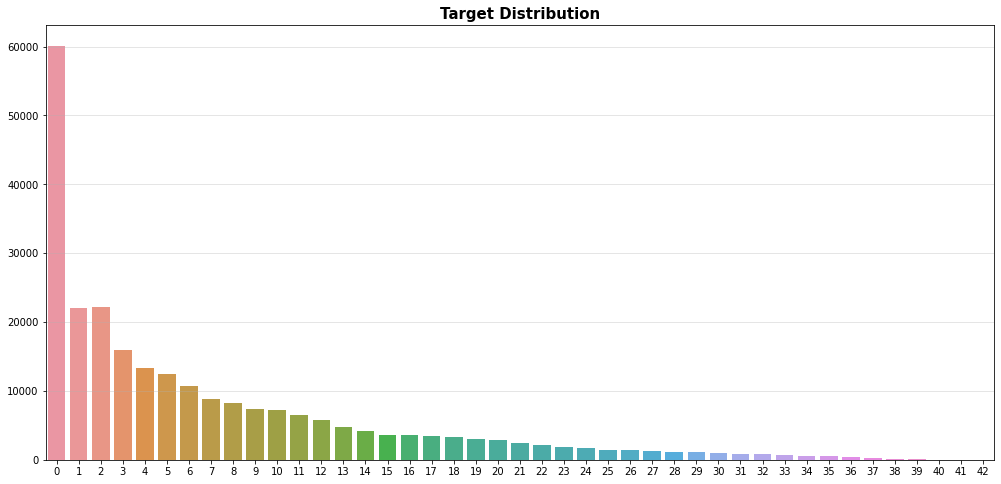

In [8]:
train_data_loss = train_data['loss'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.barplot(x= train_data_loss.index, y = train_data_loss.values)
ax.set_title('Target Distribution', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

In [9]:
loss_percentage = (sum(train_data_loss[:10]) / sum(train_data_loss))*100
print("There are total of "+ str(len(train_data_loss)))
print("Top 10 distrubtion have " + str(loss_percentage)+"%" +" of the total")

There are total of 43
Top 10 distrubtion have 72.5836% of the total


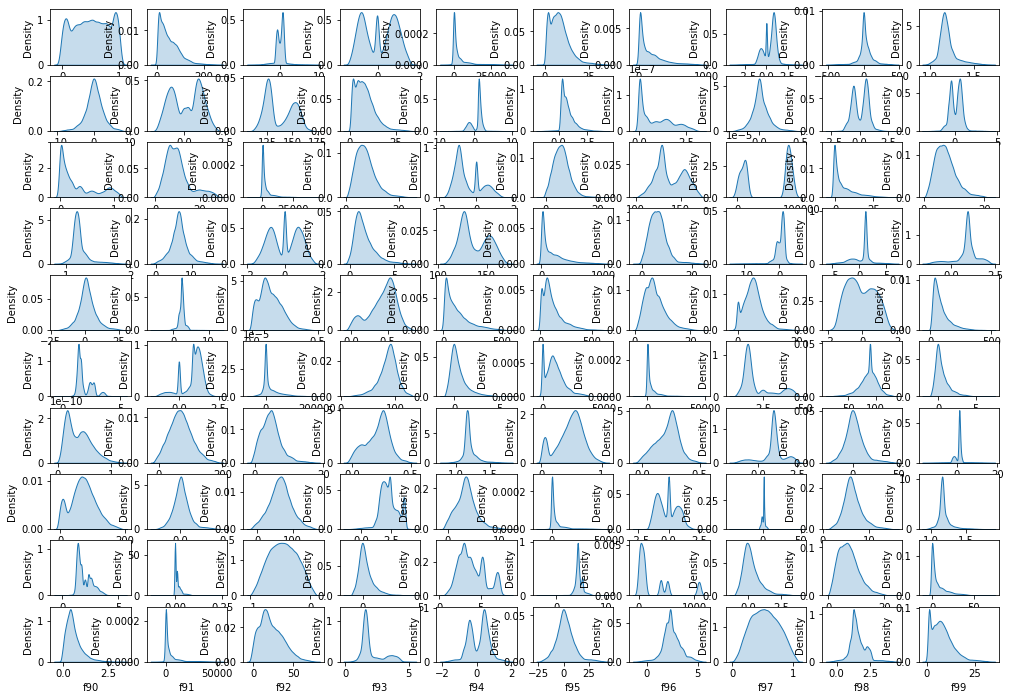

In [10]:
fig, axes = plt.subplots(10,10,figsize=(17, 12))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    sns.kdeplot(data=train_data, x=f'f{idx}', fill=True, ax=ax)
plt.show()

In [11]:
X = train_data.drop(['loss'], axis = 1)
y = train_data['loss']

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X_scaled = StandardScaler().fit_transform(X)
Test_scaled = StandardScaler().fit_transform(test_data.drop(['id'], axis = 1))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from catboost import CatBoostRegressor

In [16]:
CatBoost = CatBoostRegressor(loss_function='RMSE',
                        learning_rate = 0.01,
                        depth = 4,
                        n_estimators = 300)

In [17]:
from xgboost import XGBRegressor

In [18]:
XGBRegress = XGBRegressor(max_depth=4, 
                          learning_rate=0.01, 
                          n_estimators=500)

In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [20]:
estimators = [('XGB', CatBoost), 
              ('LGBM', XGBRegress)] 
reg = StackingRegressor(estimators = estimators, 
                            final_estimator = LinearRegression())

In [21]:
#reg.fit(X_train, y_train) 

I used stackingregressor to use both Catboost and XGBRegressor. Since StackingRegressor takes so long to execute, I decided to execute with Catboost only. 

In [22]:
CatBoost.fit(X_train, y_train,
       early_stopping_rounds=5,
       eval_set=[(X_test, y_test)],
       verbose=True)

0:	learn: 7.9386490	test: 7.9428879	best: 7.9428879 (0)	total: 97.4ms	remaining: 29.1s
1:	learn: 7.9384288	test: 7.9426833	best: 7.9426833 (1)	total: 137ms	remaining: 20.5s
2:	learn: 7.9381584	test: 7.9424111	best: 7.9424111 (2)	total: 172ms	remaining: 17s
3:	learn: 7.9378846	test: 7.9421544	best: 7.9421544 (3)	total: 213ms	remaining: 15.8s
4:	learn: 7.9376022	test: 7.9418911	best: 7.9418911 (4)	total: 250ms	remaining: 14.8s
5:	learn: 7.9373450	test: 7.9416509	best: 7.9416509 (5)	total: 284ms	remaining: 13.9s
6:	learn: 7.9370687	test: 7.9413838	best: 7.9413838 (6)	total: 316ms	remaining: 13.2s
7:	learn: 7.9367705	test: 7.9410957	best: 7.9410957 (7)	total: 351ms	remaining: 12.8s
8:	learn: 7.9365111	test: 7.9408524	best: 7.9408524 (8)	total: 385ms	remaining: 12.4s
9:	learn: 7.9362871	test: 7.9406604	best: 7.9406604 (9)	total: 423ms	remaining: 12.3s
10:	learn: 7.9360296	test: 7.9404164	best: 7.9404164 (10)	total: 462ms	remaining: 12.1s
11:	learn: 7.9357539	test: 7.9401551	best: 7.9401551 

In [23]:
y_pred = CatBoost.predict(X_test)
y_pred

array([6.6430466 , 6.83478401, 6.95813002, ..., 6.53335121, 6.95231888,
       6.99946417])

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

In [25]:
print('r2 score: ',r2_score(y_test, y_pred))
print('mean_absolute_error: ',mean_absolute_error(y_test, y_pred))
print('median_absolute_error: ',median_absolute_error(y_test, y_pred))

r2 score:  0.0074619826275392764
mean_absolute_error:  6.189129746880087
median_absolute_error:  5.680899673172588


In [26]:
test_data = test_data.drop('id', axis=1)
test_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,1.11394,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,1.09695,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,1.15222,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,1.20157,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,1.16807,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [27]:
test_scaled = StandardScaler().fit_transform(test_data)

In [28]:
test_pred = CatBoost.predict(test_scaled)

In [29]:
sample_sub = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')
sample_sub

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0
...,...,...
149995,399995,0
149996,399996,0
149997,399997,0
149998,399998,0


In [30]:
sample_sub['loss'] = test_pred
sample_sub

,id,loss
0,250000,6.996065
1,250001,6.875560
2,250002,7.137420
3,250003,6.981574
4,250004,6.962982
...,...,...
149995,399995,8.001895
149996,399996,7.899559
149997,399997,7.145663
149998,399998,6.998126


In [31]:
sample_sub.to_csv("submission.csv", index=False)